In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score

In [60]:
data = pd.read_csv("bank.csv")

In [61]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [62]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [63]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [64]:
data.shape

(45211, 17)

In [65]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [66]:
data.rename(columns={'y':'term_deposit'}, inplace=True)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [67]:
data.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
term_deposit    0
dtype: int64

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           45211 non-null  int64 
 1   job           45211 non-null  object
 2   marital       45211 non-null  object
 3   education     45211 non-null  object
 4   default       45211 non-null  object
 5   balance       45211 non-null  int64 
 6   housing       45211 non-null  object
 7   loan          45211 non-null  object
 8   contact       45211 non-null  object
 9   day           45211 non-null  int64 
 10  month         45211 non-null  object
 11  duration      45211 non-null  int64 
 12  campaign      45211 non-null  int64 
 13  pdays         45211 non-null  int64 
 14  previous      45211 non-null  int64 
 15  poutcome      45211 non-null  object
 16  term_deposit  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<Axes: xlabel='job', ylabel='count'>

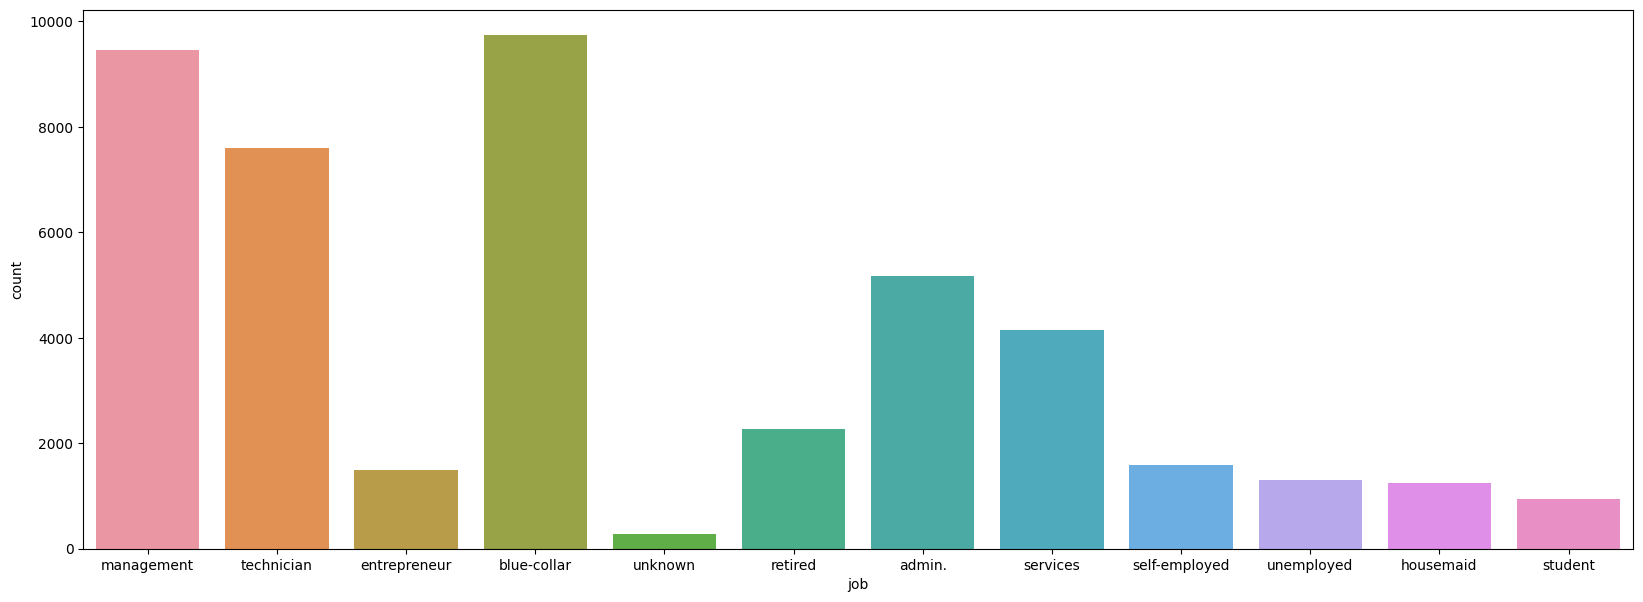

In [69]:
plt.figure(figsize = (20,7))
sns.countplot(x = "job",data = data)

<Axes: xlabel='education', ylabel='count'>

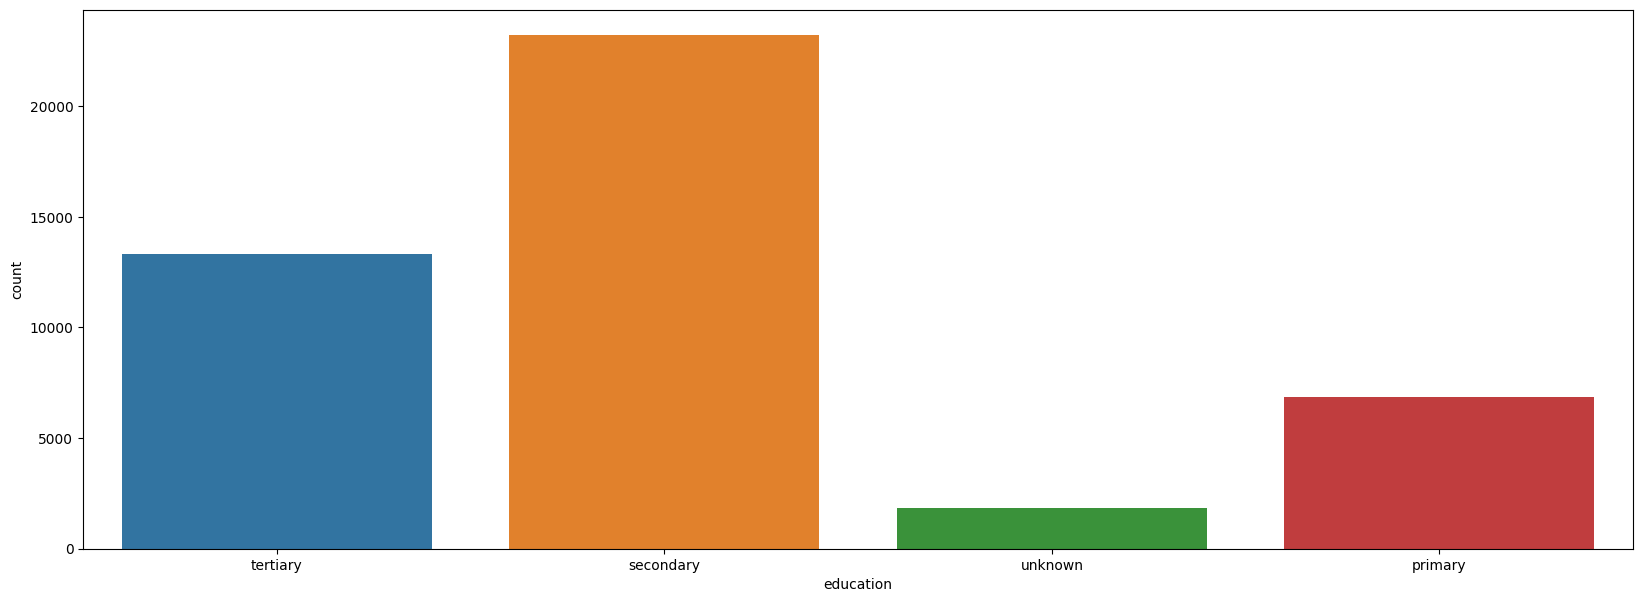

In [70]:
plt.figure(figsize = (20,7))
sns.countplot(x = "education",data = data)

<Axes: xlabel='marital', ylabel='count'>

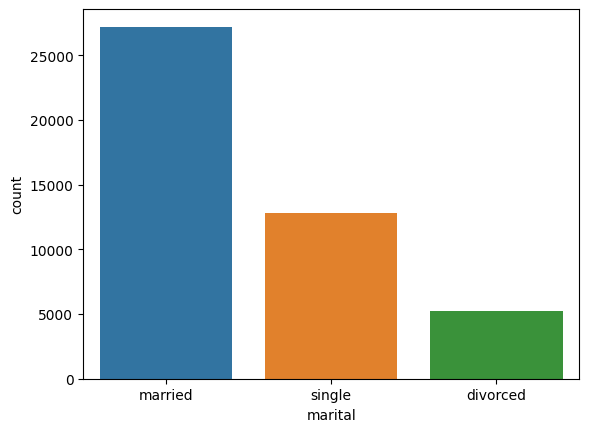

In [71]:
sns.countplot(x = "marital",data = data)

<Axes: xlabel='loan', ylabel='count'>

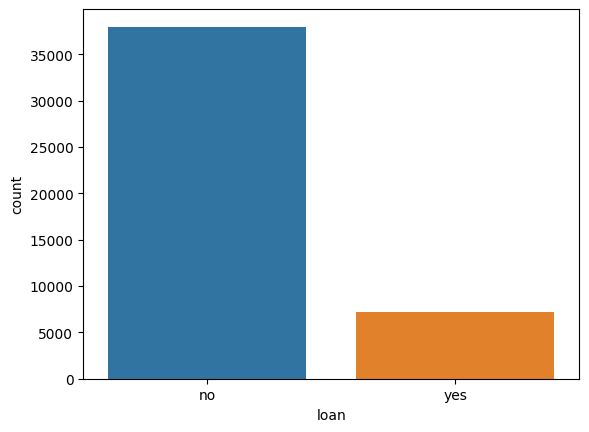

In [72]:
sns.countplot(x = "loan",data = data)

<Axes: xlabel='housing', ylabel='count'>

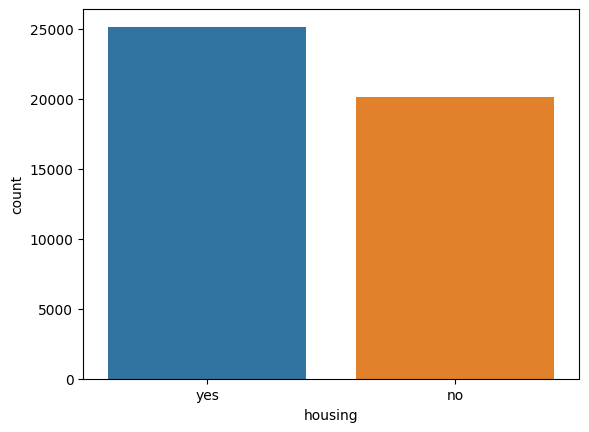

In [73]:
sns.countplot(x = "housing",data = data)

<Axes: xlabel='contact', ylabel='count'>

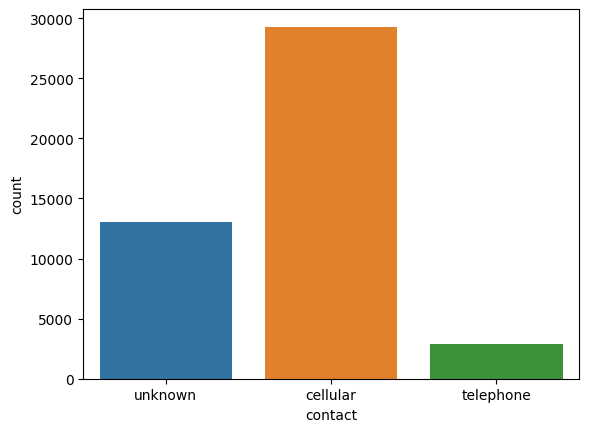

In [74]:
sns.countplot(x = "contact",data = data)

<ipython-input-75-4453a3da6113>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


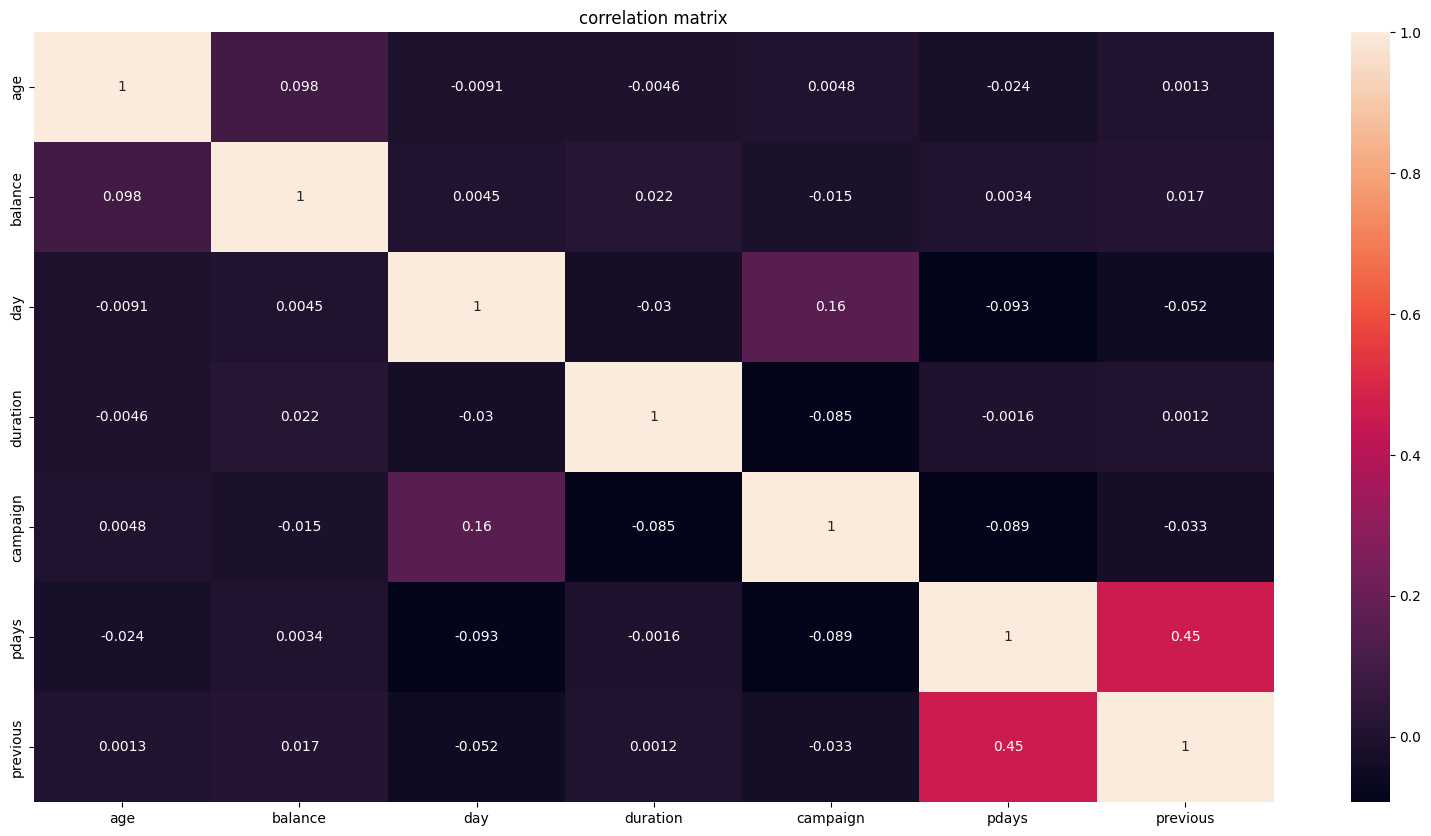

In [75]:
correlation_matrix = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket')
plt.title('correlation matrix')
plt.show()

In [76]:
a1=data.drop(columns=['job','marital','education','contact','poutcome','day','month','housing','loan','default'],axis=1)
a1

,age,balance,duration,campaign,pdays,previous,term_deposit
0,58,2143,261,1,-1,0,no
1,44,29,151,1,-1,0,no
2,33,2,76,1,-1,0,no
3,47,1506,92,1,-1,0,no
4,33,1,198,1,-1,0,no
...,...,...,...,...,...,...,...
45206,51,825,977,3,-1,0,yes
45207,71,1729,456,2,-1,0,yes
45208,72,5715,1127,5,184,3,yes
45209,57,668,508,4,-1,0,no


In [77]:
x=a1.drop(columns=['term_deposit'])
x

,age,balance,duration,campaign,pdays,previous
0,58,2143,261,1,-1,0
1,44,29,151,1,-1,0
2,33,2,76,1,-1,0
3,47,1506,92,1,-1,0
4,33,1,198,1,-1,0
...,...,...,...,...,...,...
45206,51,825,977,3,-1,0
45207,71,1729,456,2,-1,0
45208,72,5715,1127,5,184,3
45209,57,668,508,4,-1,0


In [78]:
y=data['term_deposit']
y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: term_deposit, Length: 45211, dtype: object

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [80]:
d=LogisticRegression()
d.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [81]:
train_score = d.score(x_train,y_train)
print(train_score)

test_score = d.score(x_test,y_test)
print(test_score)

0.8888520238885202
0.8890854804821409


In [82]:
print(classification_report(y_test,d.predict(x_test)))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94      7994
         yes       0.58      0.15      0.24      1049

    accuracy                           0.89      9043
   macro avg       0.74      0.57      0.59      9043
weighted avg       0.86      0.89      0.86      9043



In [83]:
l1=['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'marital', 'education', 'job', 'housing', 'loan']

In [84]:
def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)
    print('Testing Score',test_score)

In [85]:
a2 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
a2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [86]:
ypred_a2 = a2.predict(x_test)

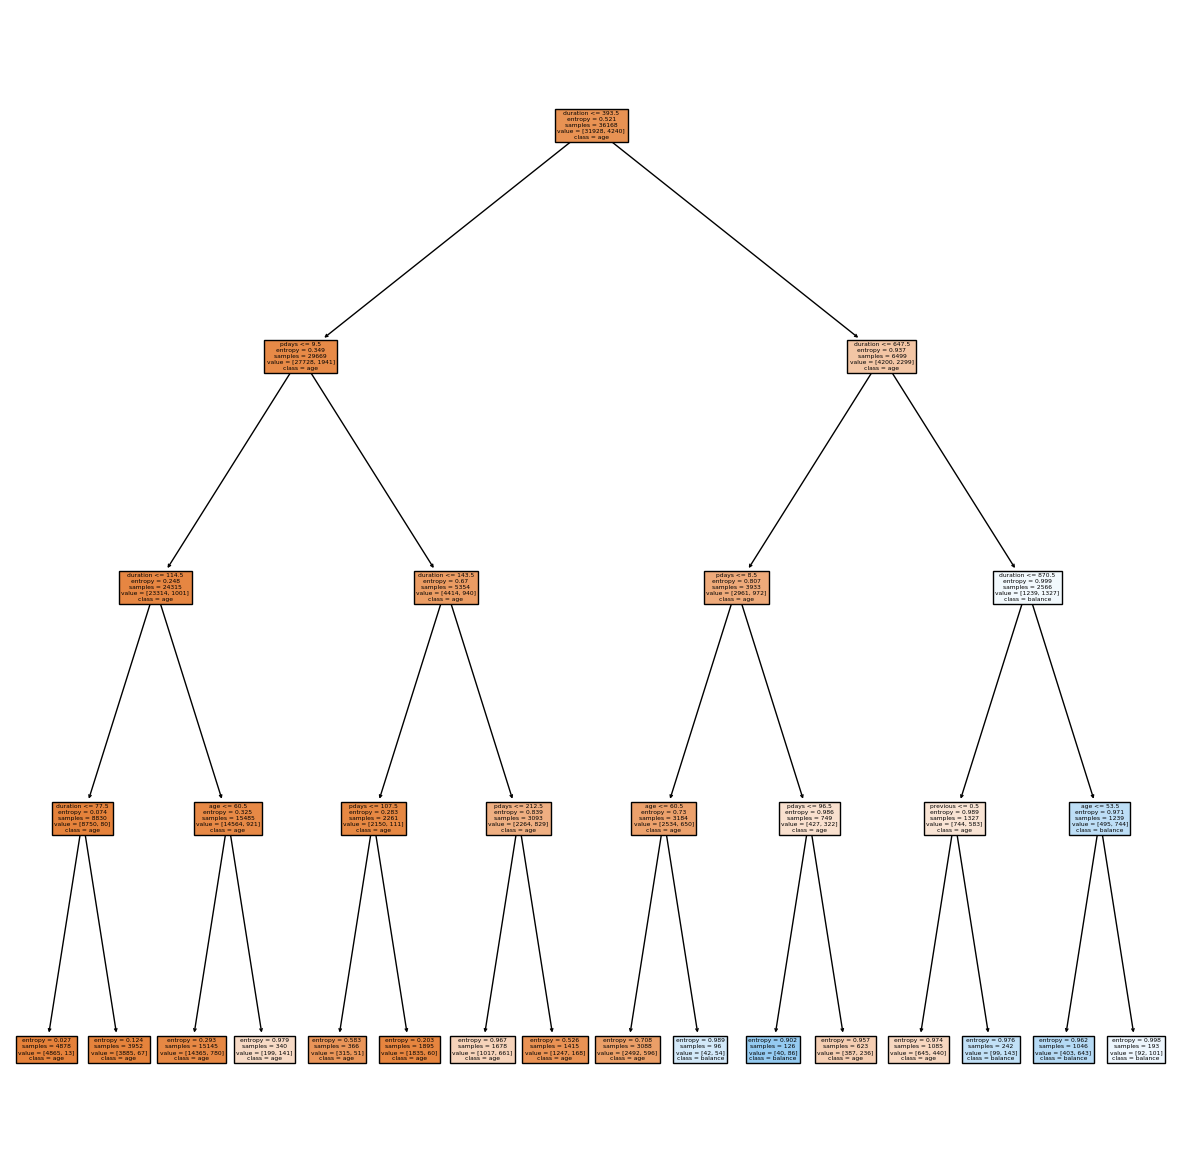

In [87]:
plt.figure(figsize=(15,15))
plot_tree(a2,feature_names=l1,class_names=l1,filled=True)
plt.show()